<h2> Supervised Learning Project </h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<b>Read the column description and ensure you understand each attribute well </b>

In [16]:
# Find best features
corr={}
for i in columns:
    correlation=data[i].corr(data['Personal Loan'])
    corr[i]=correlation
print({k: v for k, v in sorted(corr.items(), key=lambda item: item[1])})

{'Experience': -0.008303874744943427, 'Age': -0.007725617173534048, 'ZIP Code': 0.00010737635433530984, 'CreditCard': 0.0028015088415559455, 'Online': 0.006277815396758596, 'Securities Account': 0.021953882216311314, 'Family': 0.06136704401190926, 'Education': 0.13672155003028083, 'Mortgage': 0.14209523632788298, 'CD Account': 0.31635482941440385, 'CCAvg': 0.36688873553707924, 'Income': 0.5024622924949339}


#<b>Observation</b>
- Experience Column is having negative values which might be due to improper data record.
- The negative values are converted to positive values here
- Also the correlation between each features and the target columns are listed in ascending order
- This shows the columns CD Account,CCAvg,Income has the most feature importance

In [2]:
#handling -ve values
data=data.applymap(lambda x:abs(x))

<b> Study the data distribution in each attribute, share your findings </b>

<Figure size 640x480 with 0 Axes>

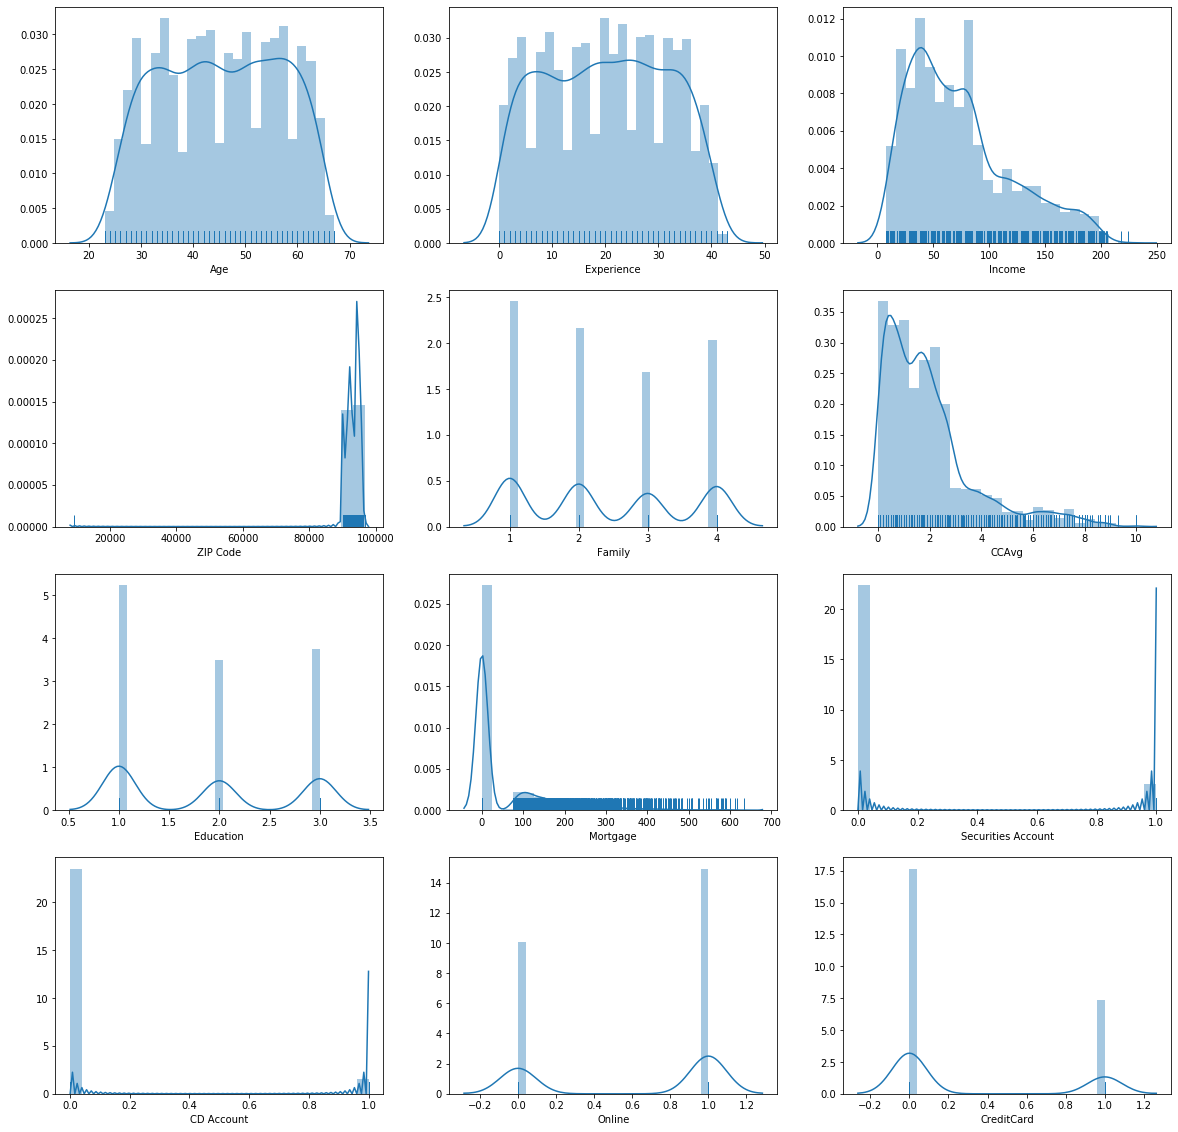

In [4]:
from matplotlib.pyplot import figure
import seaborn as sns
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
columns=list(data.columns.values)
columns.remove('ID')
columns.remove('Personal Loan')

plt.figure(figsize=(20,20))
for i,val in enumerate(columns):
    plt.subplot(4,3,i+1)
    x = data[val]
    ax = sns.distplot(x,bins=25,rug=True)

<b> #Observations </b> </n>
- Age and Experience has distributions all over the graph
- Income - Most of the people income range between 20 to 100
- Avg. spending on credit cards per month lies majorly on the less 2000$ range
- Securities Account - Most customer does not have Securities Account
- CD Account - Most customer does not have Certificate of deposit
- Online - There is not much difference between online and offline users.

<b> Get the target column distribution. Your comments<b>

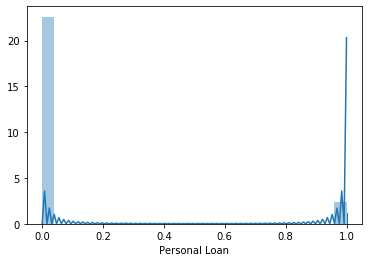

In [19]:
x = data['Personal Loan']
ax = sns.distplot(x,bins=25,rug=True)

<b> Observations </b>
- The data seems to be highly Imbalanced.
- This might affect the performance of Knearest Neighbours. Upsamping could solve the issue

<b> Split the data into training and test set in the ratio of 70:30 respectively </b>

In [21]:
# Taking only important features considering the performance of Knearest Neigbours (Curse of dimension)
X=data[['Income','CCAvg','CD Account','Mortgage']]
y=data['Personal Loan']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)
X_train.head()


,Income,CCAvg,CD Account,Mortgage
2103,153,6.5,0,0
3090,19,1.5,0,0
1419,39,1.5,0,0
106,69,2.9,0,0
4163,108,1.9,0,0


In [33]:
X_test.shape

(1500, 4)

<b> Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans </n>
Print the confusion matrix for all the above models (Available in each model output)</b>

<h2> K Nearest Neighbour </h2>

{'n_neighbors': [1, 2, 4, 5, 8, 10, 16, 25, 50]}
Best Hyper parameter: 25


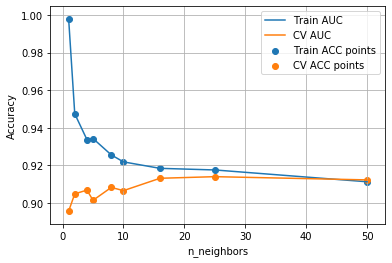

KNN_accuracy 0.896
cf_matrix_test 
 [[1314   26]
 [ 130   30]]


(0, 2)

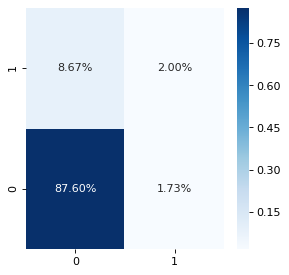

In [41]:
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

estimator=KNeighborsClassifier()
parameters={'n_neighbors':[1,2,4,5,8,10,16,25,50]}
print(parameters)
#print(list(y_train))

clf = GridSearchCV(estimator, parameters, cv=3, scoring='accuracy',return_train_score=True)
clf.fit(X_train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results
best_hyper_parameter=clf.best_estimator_.get_params()['n_neighbors']
print('Best Hyper parameter:', clf.best_estimator_.get_params()['n_neighbors'])
######################################################################################
import matplotlib.pyplot as plt
train_acc= results['mean_train_score']
 
cv_acc = results['mean_test_score'] 

K =  results['param_n_neighbors']

plt.plot(K, train_acc, label='Train AUC')

plt.plot(K, cv_acc, label='CV AUC')


plt.scatter(K, train_acc, label='Train ACC points')
plt.scatter(K, cv_acc, label='CV ACC points')

plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()

plt.show()
######################################################################################
from sklearn.metrics import confusion_matrix

estimator=KNeighborsClassifier(n_neighbors=best_hyper_parameter)

estimator.fit(X_train, y_train)
y_train_pred = estimator.predict(X_train)    
y_test_pred = estimator.predict(X_test)  

from sklearn.metrics import accuracy_score
KNN_accuracy=accuracy_score(y_test, y_test_pred)
print('KNN_accuracy',KNN_accuracy)

cf_matrix=confusion_matrix(y_test,y_test_pred)
print('cf_matrix_test \n',cf_matrix)


figure(num=None, figsize=(4, 4), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax=plt.gca()
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)

In [25]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

<h2> Logistic Regression </h2>

{'C': [0.001, 0.01, 0.1, 1, 10]}
Best Hyper parameter: 10


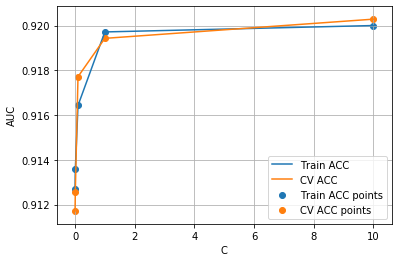

log_reg_accuracy 0.9153333333333333
cf_matrix_test 
 [[1303   37]
 [  90   70]]


(0, 2)

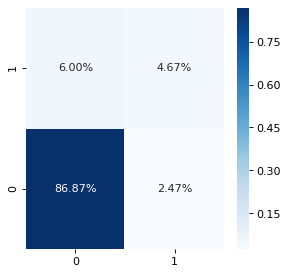

In [43]:
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
parameters={'C':[0.001,0.01,0.1,1,10]}
print(parameters)

clf = GridSearchCV(estimator, parameters, cv=3, scoring='accuracy',return_train_score=True)
clf.fit(X_train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results
#results.sort_values(by=['param_n_neighbors'],ascending=True,inplace=True)
results.head()
best_hyper_parameter=clf.best_estimator_.get_params()['C']
print('Best Hyper parameter:', clf.best_estimator_.get_params()['C'])
results.head()
######################################################################################
import matplotlib.pyplot as plt
train_acc= results['mean_train_score']
 
cv_acc = results['mean_test_score'] 

K =  results['param_C']

plt.plot(K, train_acc, label='Train ACC')

plt.plot(K, cv_acc, label='CV ACC')


plt.scatter(K, train_acc, label='Train ACC points')
plt.scatter(K, cv_acc, label='CV ACC points')

plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.grid()

plt.show()

######################################################################################
estimator=LogisticRegression(C=best_hyper_parameter)

estimator.fit(X_train, y_train)
y_train_pred = estimator.predict(X_train)    
y_test_pred = estimator.predict(X_test)  

#Accuracy
from sklearn.metrics import accuracy_score
log_reg_accuracy=accuracy_score(y_test, y_test_pred)
print('log_reg_accuracy',log_reg_accuracy)

cf_matrix=confusion_matrix(y_test,y_test_pred)
print('cf_matrix_test \n',cf_matrix)

figure(num=None, figsize=(4, 4), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax=plt.gca()
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)

<h2> Naive Bayes </h2>

NB_accuracy 0.8786666666666667
cf_matrix_test 
 [[1220  120]
 [  62   98]]


(0, 2)

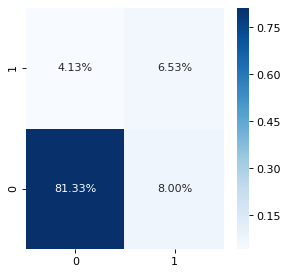

In [44]:
from sklearn.naive_bayes import GaussianNB
estimator=GaussianNB()

estimator.fit(X_train,y_train)

y_train_pred = estimator.predict(X_train)    
y_test_pred = estimator.predict(X_test)  

NB_accuracy=accuracy_score(y_test, y_test_pred)
print('NB_accuracy',NB_accuracy)

cf_matrix=confusion_matrix(y_test,y_test_pred)
print('cf_matrix_test \n',cf_matrix)

figure(num=None, figsize=(4, 4), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax=plt.gca()
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)

<b> Give your reasoning on which is the best model in this case and why it performs better </b>

In [45]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "True Positive", "True Negative","Total Points","Accuracy"]

x.add_row(["K Nearest Neighbor", 1314,30,1500,KNN_accuracy])
x.add_row(["Logistic Regression", 1303, 70,1500,log_reg_accuracy])
x.add_row(["Naive Bayes", 1220, 98,1500,NB_accuracy])
print(x)

+---------------------+---------------+---------------+--------------+--------------------+
|        Model        | True Positive | True Negative | Total Points |      Accuracy      |
+---------------------+---------------+---------------+--------------+--------------------+
|  K Nearest Neighbor |      1314     |       30      |     1500     |       0.896        |
| Logistic Regression |      1303     |       70      |     1500     | 0.9153333333333333 |
|     Naive Bayes     |      1220     |       98      |     1500     | 0.8786666666666667 |
+---------------------+---------------+---------------+--------------+--------------------+


<b> Observations </b>
- I think logistic regression is the best model here since it has a higher accuracy and it falls between Knn and NB in terms of predicting True Negatives
- KNN does a poor job of predicting True Negatives since the data is highly imbalanced here.
- Naive Bayes despite being a basic model, does surprisingly well
- logistic regression performs better than the other two models since KNN has data imbalance issue and Naive Bayes being a basic model